# KNN-3

### Q1. Write a Python code to implement the KNN classifier algorithm on load_iris dataset in sklearn.datasets.

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.datasets import load_iris

In [26]:
# Load the iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the target variable to the dataframe
df['target'] = iris.target

In [27]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
# Spliting test and Train:

from sklearn.model_selection import train_test_split

X = df.drop(columns = ['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 30)
X_train.shape, X_test.shape

((112, 4), (38, 4))

In [29]:
# Standardizing the data:

from sklearn.preprocessing import StandardScaler

##standard Scaling- Standardization
def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

In [30]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

In [31]:
# Applying KNN Classifier:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [32]:
knn.fit(X_train_scaled, y_train) 

KNeighborsClassifier()

In [33]:
y_pred = knn.predict(X_test_scaled)

In [34]:
y_pred

array([0, 0, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 2, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2])

In [35]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print('Classification Report:\n',classification_report(y_test,y_pred))
print('------------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('------------------------------------------------')
print('Test Accuracy for KNN Classifier is',accuracy_score(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      1.00      0.96        11
           2       1.00      0.93      0.97        15

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

------------------------------------------------
Confusion Matrix:
 [[12  0  0]
 [ 0 11  0]
 [ 0  1 14]]
------------------------------------------------
Test Accuracy for KNN Classifier is 0.9736842105263158


### Q3. Write a Python code snippet to find the optimal value of K for the KNN classifier algorithm using cross-validation on load_iris dataset in sklearn.datasets.

In [39]:
# Import necessary libraries:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Load the iris dataset
# Split train and test data 
# apply Standardizing
# Continuing from previous code:

In [36]:
X_train_scaled.shape, X_test_scaled.shape

((112, 4), (38, 4))

In [37]:
# Initialize lists to store results
k_values = list(range(1, 31))  # Try K values from 1 to 30
cv_scores = []

In [40]:
# Perform 5-fold cross-validation for different K values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# Find the optimal K value with the highest cross-validation score
optimal_k = k_values[np.argmax(cv_scores)]

In [41]:
# Print the optimal K value and its corresponding accuracy
print(f"Optimal K value: {optimal_k}")
print(f"Accuracy with optimal K: {max(cv_scores)}")

Optimal K value: 6
Accuracy with optimal K: 0.9800000000000001


Optimal K value: 6
Accuracy with optimal K: 0.9800000000000001


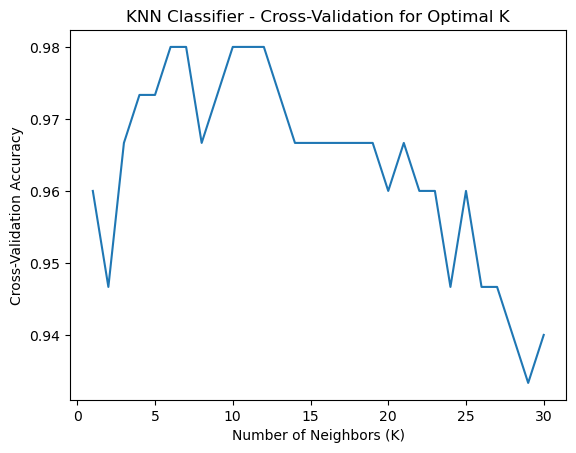

In [42]:
# Print the optimal K value and its corresponding accuracy
print(f"Optimal K value: {optimal_k}")
print(f"Accuracy with optimal K: {max(cv_scores)}")

# Plot the cross-validation accuracy for different K values
import matplotlib.pyplot as plt

plt.plot(k_values, cv_scores)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN Classifier - Cross-Validation for Optimal K')
plt.show()

### Q2. Write a Python code to implement the KNN regressor algorithm on load_boston dataset in sklearn.datasets.

In [2]:
# Import the necessary libraries:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# Read the dataset:
df2 = pd.read_csv('HousingData.csv')

In [4]:
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
# Checking for null values:
df2.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

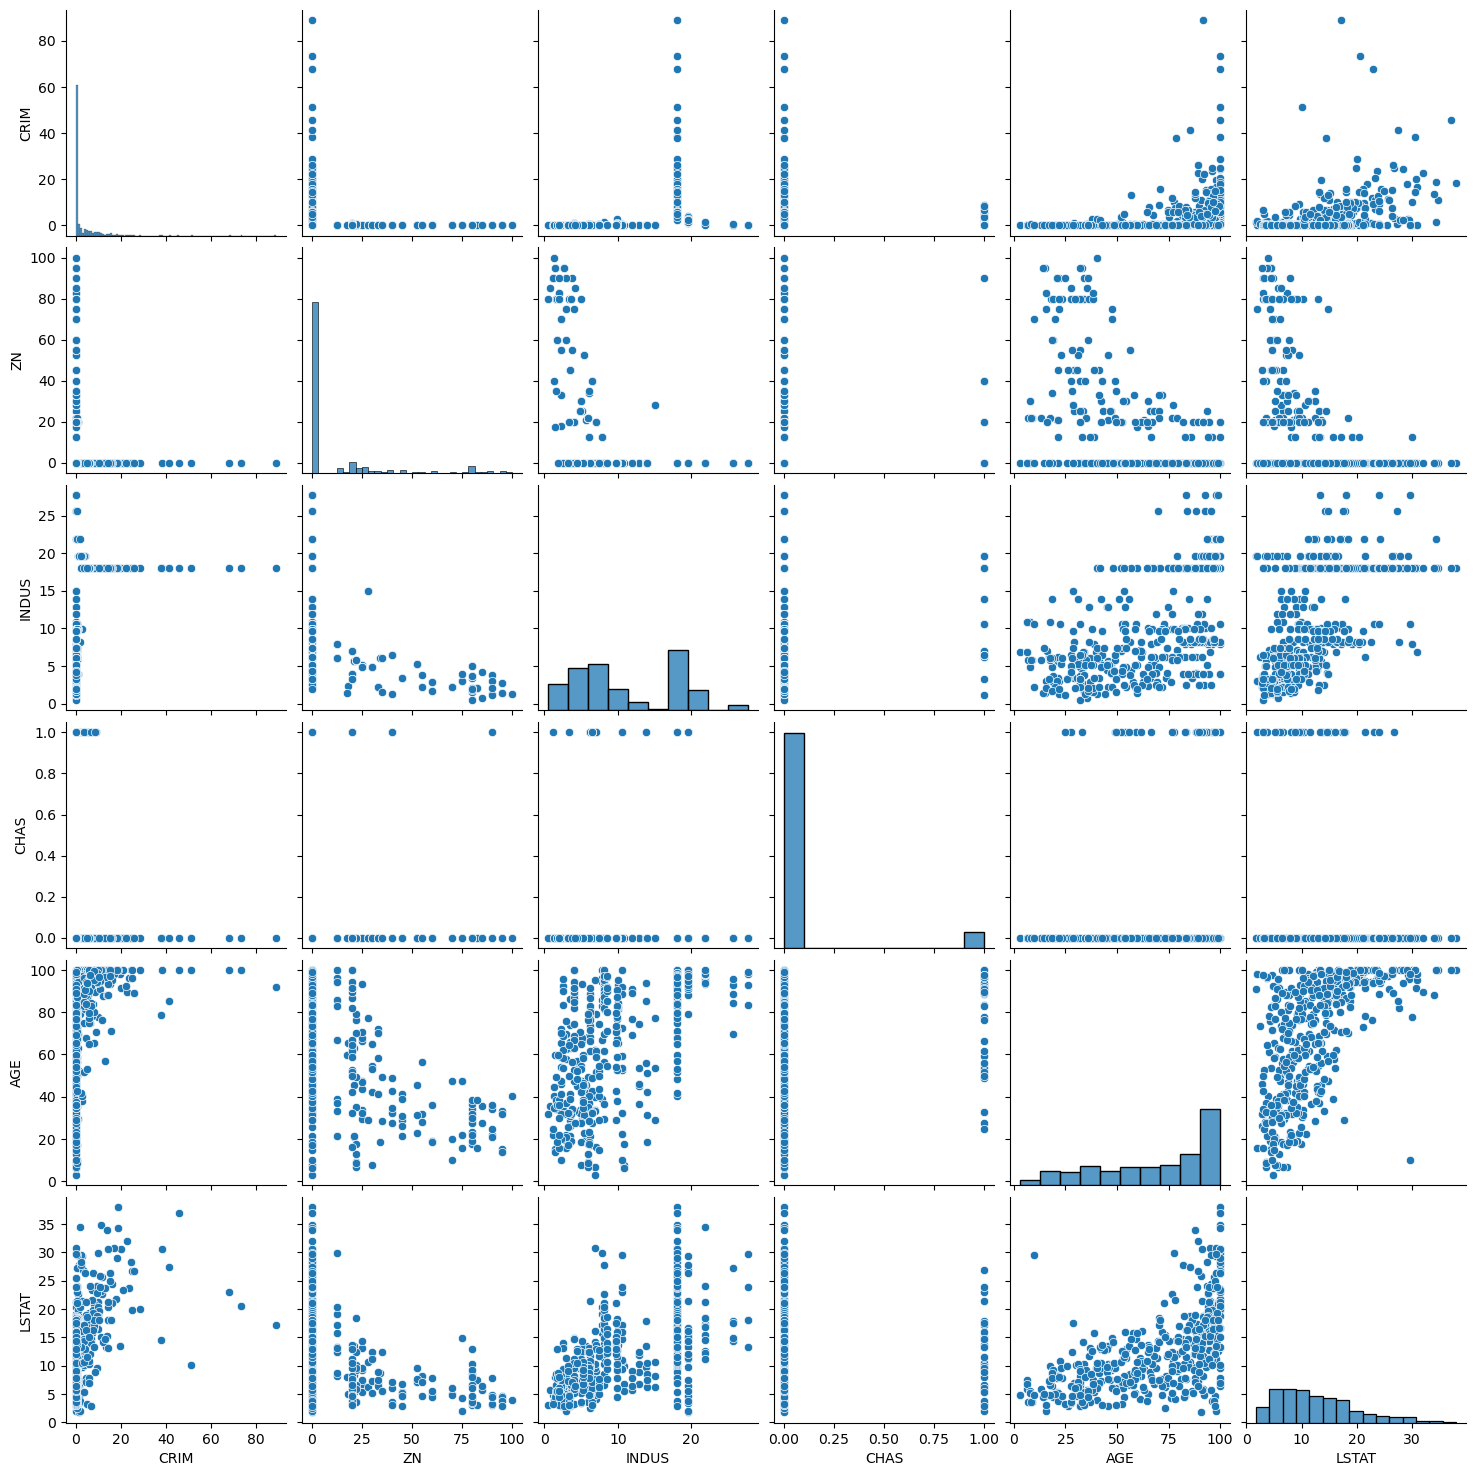

In [7]:
# Checking for the distribution of features with missing values:
sns.pairplot(data = df2, vars = ['CRIM','ZN','INDUS','CHAS','AGE','LSTAT'])

In [9]:
# Replacing all missing values with respective mean, meadian and mode:

df2['CRIM'] = df2['CRIM'].fillna(df2['CRIM'].median())
df2['ZN'] = df2['ZN'].fillna(df2['ZN'].median())
df2['INDUS'] = df2['INDUS'].fillna(df2['INDUS'].mean())
df2['AGE'] = df2['AGE'].fillna(df2['AGE'].mean())
df2['LSTAT'] = df2['LSTAT'].fillna(df2['LSTAT'].mean())

In [10]:
# Dropping remaining missing values for categorical feature:
df2.dropna(inplace = True)

In [11]:
# checking missing values again:
df2.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [12]:
df2.shape

(486, 14)

In [13]:
# Spliting test and Train:

from sklearn.model_selection import train_test_split

X2 = df2.drop(columns = ['MEDV'])
y2 = df2['MEDV']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.25, random_state = 30)
X_train2.shape, X_test2.shape,y_train2.shape

((364, 13), (122, 13), (364,))

In [15]:
# Applying KNN Regressor:

from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor()

In [20]:
knnr.fit(X_train2,y_train2)

KNeighborsRegressor()

In [21]:
y_pred2=knnr.predict(X_test2)

In [22]:
y_pred2

array([28.74, 33.76, 21.14, 28.02, 25.12, 27.22, 23.5 , 21.88, 20.54,
       33.4 , 23.04, 21.5 , 26.08, 10.96, 17.42, 19.86, 33.82, 21.36,
       21.92, 37.36,  9.76, 14.02, 19.76, 24.44, 31.46, 30.18, 40.6 ,
       18.12, 17.14, 29.96, 21.94, 26.98,  9.5 , 26.08, 21.78, 17.14,
       19.14, 15.22, 39.04, 18.96, 26.08, 28.3 , 22.12, 17.86, 18.  ,
       22.  ,  9.54, 20.98, 43.28, 26.08, 13.26, 22.42, 34.76, 25.16,
       20.36, 19.12, 17.52, 17.38,  8.88, 29.66, 11.86, 19.76, 23.12,
       27.16, 21.5 , 18.64, 18.96, 30.5 , 29.72, 17.86, 21.74, 17.  ,
       26.42, 20.78, 32.52, 31.14, 13.84, 19.94, 13.3 , 23.1 , 20.58,
       25.16, 30.46, 24.96, 32.3 , 23.54, 22.22, 21.26, 10.04, 40.6 ,
       17.  , 36.3 , 11.8 , 23.2 , 14.32, 18.9 , 39.04, 20.52, 33.14,
        9.5 , 23.64, 20.1 , 17.88, 26.26, 39.04, 38.12, 17.18, 21.  ,
       18.38, 24.4 , 27.7 , 29.62, 25.52, 12.62, 13.16, 26.4 , 21.  ,
       22.42, 17.38, 26.14, 17.86,  8.88])

In [24]:
# checking model scores using MSE, RMSE and R2 score:

from sklearn.metrics import mean_squared_error , r2_score

print('MSE of test set :',mean_squared_error(y_test2,y_pred2))
print('RMSE of test set :',np.sqrt(mean_squared_error(y_test2,y_pred2)))
print('R2 score of test set :',r2_score(y_test2,y_pred2))

MSE of test set : 39.439059016393436
RMSE of test set : 6.280052469238886
R2 score of test set : 0.4152524629764095


### The accuracy of the model is poor because of presence of outliers.

### Q4. Implement the KNN regressor algorithm with feature scaling on load_boston dataset in sklearn.datasets.

In [1]:
# import libraries 
# load_data
# Split train and split 
# Continuing from previous code:

In [15]:
from sklearn.preprocessing import StandardScaler

# standard Scaling- Standardization
def scaler_standard(X_train2, X_test2):
    scaler = StandardScaler()
    X_train_scaled2 = scaler.fit_transform(X_train2)
    X_test_scaled2 = scaler.transform(X_test2)
    return X_train_scaled2, X_test_scaled2

In [17]:
X_train_scaled2, X_test_scaled2 = scaler_standard(X_train2, X_test2)

In [21]:
# Applying KNN Regressor:

from sklearn.neighbors import KNeighborsRegressor
knnr_scaled = KNeighborsRegressor()

In [23]:
knnr_scaled.fit(X_train_scaled2,y_train2)

KNeighborsRegressor()

In [25]:
y_pred_scaled2=knnr_scaled.predict(X_test_scaled2)

In [26]:
y_pred_scaled2

array([18.74, 24.7 , 21.1 , 19.5 , 37.56, 20.3 , 22.08, 21.72, 19.5 ,
       29.24, 22.18, 27.9 , 35.28, 10.02, 16.68, 13.92, 26.58, 16.08,
       21.08, 23.1 , 10.42, 18.1 , 23.6 , 22.66, 31.62, 34.54, 33.74,
       20.08, 13.68, 25.64, 18.72, 20.58,  8.88, 24.06, 19.64, 32.24,
       19.7 , 14.72, 39.9 , 18.54, 21.24, 28.12, 22.88, 19.22, 32.24,
       15.38,  9.76, 22.28, 28.78, 35.28, 17.  , 25.26, 28.08, 20.36,
       17.5 , 18.84, 14.52, 17.22, 10.72, 27.98, 14.66, 21.08, 27.82,
       25.9 , 20.  , 38.88, 15.88, 18.88, 23.76, 19.14, 21.22, 18.82,
       22.64, 22.44, 36.68, 25.88, 15.94, 24.46, 10.2 , 21.26, 21.26,
       21.2 , 23.5 , 16.08, 22.  , 19.26, 18.92, 20.8 , 10.66, 33.74,
       18.82, 32.54, 14.44, 30.02, 17.34, 18.4 , 39.9 , 20.98, 33.14,
       10.62, 26.18, 16.14, 14.6 , 29.38, 25.72, 30.68, 12.9 , 22.44,
       16.76, 25.26, 20.72, 27.36, 22.48, 14.2 , 13.94, 21.64, 22.44,
       24.76, 17.22, 21.88, 16.56, 11.08])

In [27]:
# checking model scores using MSE, RMSE and R2 score:

from sklearn.metrics import mean_squared_error , r2_score

print('MSE of test set :',mean_squared_error(y_test2,y_pred_scaled2))
print('RMSE of test set :',np.sqrt(mean_squared_error(y_test2,y_pred_scaled2)))
print('R2 score of test set :',r2_score(y_test2,y_pred_scaled2))

MSE of test set : 17.464609836065566
RMSE of test set : 4.179068058319411
R2 score of test set : 0.7410590454890827


#### After scaling we can see the accuracy or the R2 score value has improved significantly

### Q5. Write a Python code snippet to implement the KNN classifier algorithm with weighted voting on load_iris dataset in sklearn.datasets.

In [ ]:
#CODE:

# import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the KNN classifier with weighted voting
k = 5  # You can adjust the number of neighbors (k)
knn = KNeighborsClassifier(n_neighbors=k, weights='distance')  # Use 'distance' for weighted voting

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN classifier with weighted voting: {accuracy:.2f}")


### Q6. Implement a function to standardise the features before applying KNN classifier.

In [ ]:
from sklearn.preprocessing import StandardScaler

def standardize_features(X_train, X_test):
    """
    Standardize the features using StandardScaler.

    Parameters:
    X_train : Training data features.
    X_test : Testing data features.

    Returns:
    X_train_scaled: Standardized training data features.
    X_test_scaled: Standardized testing data features.
    """

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit the scaler on the training data and transform both training and testing data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
X_train_scaled, X_test_scaled = standardize_features(X_train, X_test)

# Initialize the KNN classifier
k = 5  # You can adjust the number of neighbors (k)
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model to the standardized training data
knn.fit(X_train_scaled, y_train)

# Make predictions on the standardized test data
y_pred = knn.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN classifier with standardized features: {accuracy:.2f}")


### Q7. Write a Python function to calculate the euclidean distance between two points.

In [31]:
import numpy as np

def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points in n-dimensional space.

    Parameters:
    point1 : The coordinates of the first point.
    point2 : The coordinates of the second point.

    Returns:
    distance (float): The Euclidean distance between the two points.
    """
    if len(point1) != len(point2):
        raise ValueError("Points must have the same dimensionality.")
    
    # Calculate the squared differences for each dimension
    squared_diff = [(a - b) ** 2 for a, b in zip(point1, point2)]
    
    # Sum the squared differences and take the square root to get the Euclidean distance
    distance = np.sqrt(sum(squared_diff))
    
    return distance


point1 = np.array([1, 2, 3])
point2 = np.array([4, 5, 6])

distance = euclidean_distance(point1, point2)
print(f"Euclidean distance between point1 and point2: {distance:.2f}")


Euclidean distance between point1 and point2: 5.20


### Q8. Write a Python function to calculate the manhattan distance between two points.

In [32]:
import numpy as np

def manhattan_distance(point1, point2):
    """
    Calculate the Manhattan distance between two points in n-dimensional space.

    Parameters:
    point1 : The coordinates of the first point.
    point2 : The coordinates of the second point.

    Returns:
    distance (float): The Manhattan distance between the two points.
    """
    if len(point1) != len(point2):
        raise ValueError("Points must have the same dimensionality.")
    
    # Calculate the absolute differences for each dimension
    absolute_diff = [abs(a - b) for a, b in zip(point1, point2)]
    
    # Sum the absolute differences to get the Manhattan distance
    distance = sum(absolute_diff)
    
    return distance

point1 = np.array([1, 2, 3])
point2 = np.array([4, 5, 6])

distance = manhattan_distance(point1, point2)
print(f"Manhattan distance between point1 and point2: {distance:.2f}")


Manhattan distance between point1 and point2: 9.00
